In [1]:
from google.colab import files
uploaded = files.upload()



Saving file.csv to file.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("file.csv")  # Replace with your actual filename

# Display the first few rows
print("Head of the dataset:")
print(df.head())

# Dataset info: data types, non-null counts
print("\nDataset Info:")
print(df.info())

# Check for missing/null values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic shape of the dataset
print("\nDataset Shape:")
print(df.shape)


Head of the dataset:
      Name  Age         City
0    Alice   30     New York
1      Bob   25  Los Angeles
2  Charlie   35      Chicago

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
None

Missing Values:
Name    0
Age     0
City    0
dtype: int64

Dataset Shape:
(3, 3)


Dataset Overview:
      Name  Age         City
0    Alice   30     New York
1      Bob   25  Los Angeles
2  Charlie   35      Chicago

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
None

Missing Values Before Handling:
Name    0
Age     0
City    0
dtype: int64

Missing Values After Handling:
Name    0
Age     0
City    0
dtype: int64


<ipython-input-7-d0edcfa4402f>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-d0edcfa4402f>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

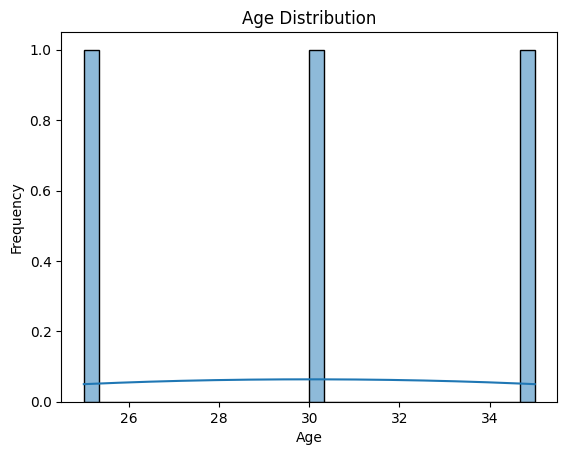

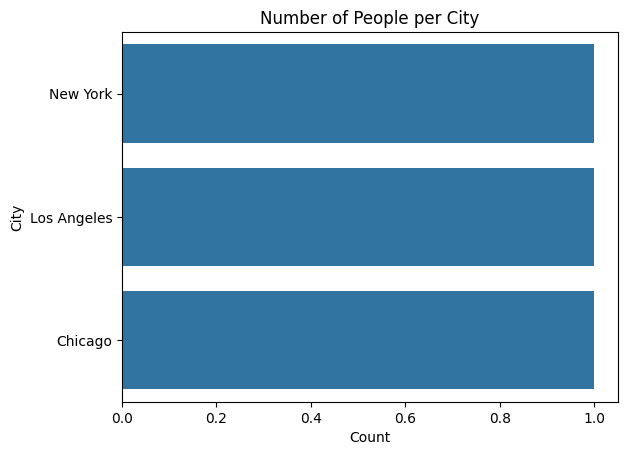

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("file.csv")  # Replace with your actual file path if needed

# Clean column names (remove spaces just in case)
df.columns = df.columns.str.strip()

# View the structure of the dataset
print("Dataset Overview:")
print(df.head())
print("\nData Info:")
print(df.info())

# Check for missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# ----- Handling Missing Values -----

# Fill missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing City values with the mode (most common city)
df['City'].fillna(df['City'].mode()[0], inplace=True)

# Fill missing Name values with 'Unknown'
df['Name'].fillna('Unknown', inplace=True)

# Check again
print("\nMissing Values After Handling:")
print(df.isnull().sum())

# ----- Visualizations -----

# Age Distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count of people by City
sns.countplot(data=df, y='City', order=df['City'].value_counts().index)
plt.title('Number of People per City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()






In [8]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Apply encoding to 'City'
df['City_encoded'] = le.fit_transform(df['City'])

print(df[['City', 'City_encoded']].drop_duplicates())


          City  City_encoded
0     New York             2
1  Los Angeles             1
2      Chicago             0


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ... (your previous code for loading and cleaning data) ...

# Identify numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Choose your scaling method:
# For normalization (MinMax scaling):
scaler = MinMaxScaler()
# For standardization (Standard scaling):
# scaler = StandardScaler()

# Apply scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nScaled Features:")
print(df[numerical_features].head())


Scaled Features:
   Age  City_encoded
0  0.5           1.0
1  0.0           0.5
2  1.0           0.0


In [6]:
print(df.columns)


Index(['Name', 'Age', 'City'], dtype='object')


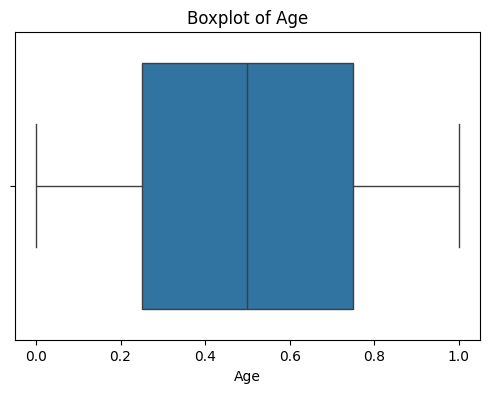

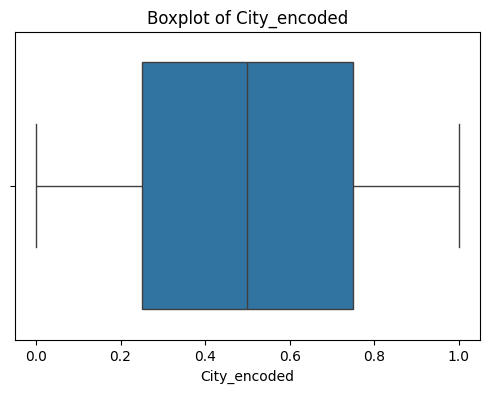


Dataset Shape After Outlier Removal: (3, 4)

Data Info After Outlier Removal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          3 non-null      object 
 1   Age           3 non-null      float64
 2   City          3 non-null      object 
 3   City_encoded  3 non-null      float64
dtypes: float64(2), object(2)
memory usage: 228.0+ bytes
None


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your previous code for loading, cleaning, and scaling data) ...

# --- Visualize Outliers with Boxplots ---
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# --- Remove Outliers ---
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Apply outlier removal to numerical features
for feature in numerical_features:
    df = remove_outliers_iqr(df, feature)

# --- Check Dataset After Outlier Removal ---
print("\nDataset Shape After Outlier Removal:", df.shape)
print("\nData Info After Outlier Removal:")
print(df.info())